## Scikit Learn
- Đây là thư viện cung cấp các thuật toán học máy. Scikit-Learn được đặc trưng bởi một API rõ ràng, thống nhất và được sắp xếp hợp lý.
- Trong phần này ta đi tìm hiểu về API scikit-learn
- 

## Data Representation in Scikit-learn - Biểu diễn dữ liệu trong sklearn
- ML tạo ra các mô hình từ dữ liệu -> ta tìm hiểu cách biểu diễn dữ liệu để máy tính hiểu được

### Data as table
- Ta hiểu rằng: bảng cơ bản là một dạng dữ liệu 2 chiều, trong đó hàng biểu thị các phần tử riêng lẻ của tập dữ liệu và các cột biểu thị các đại lượng liên quan đến từng phần tử này. VD với bộ dữ liệu: Iris

In [1]:
### import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Nhìn bảng ta thấy:
- mỗi hàng của dữ liệu đề cập đến một bông hoa được quan sát duy nhất, và số lượng hàng là tổng số bông hoa => các hàng của ma trận là mẫu (sample) và số lượng hàng là số mẫu (`n_samples`)
- mỗi cột lại đề cập đến thông tin định lượng cụ thể của từng mẫu =>  từng cột cảu ma trận là các đặc trưng (feature) và số lượng cột là số đặc trưng (`n_features`)

### Features Matrix - Đặc trưng của ma trận
- Với bố cục bảng này làm rõ ràng thông tin có thể được coi là một mảng hoặc ma trận 2 chiều và được gọi là ma trận đặc trưng. Theo quy ước ma trận đặc trưng thường được lưu trữ ở biến tên `X`, và có dạng `[n_samples, n_features]` 
- các mẫu (sample-row) luôn đề cập đến một đối tượng riêng lẻ được mô tả bởi tập dữ liệu, vd: mẫu có thể là một bông hoa, một tài liệu, một hình ảnh,... bất cứ thứ gì mà ta có thể lưu bằng tập hợp các phép đo định lượng (`Quantitative measurements`)
- các đặc trưng (feature - column) luôn đề cập đén các quan sát riêng biệt mô tả từng mẫu theo cách định lượng. Các đặc trưng thường có giá trị thực, cũng có thể là boolean, hoặc là giá trị rời rạc trong một số trường hợp.

### Target array - Mảng mục tiêu
- Ngoài ma trận đặc trưng `X`, chúng ta cũng làm việc với một nhãn (label) hoặc mảng đích (target array), mà theo quy ước ta gọi là `y`. Mảng mục tiêu thường là mảng một chiều, có độ dại là `n_samples`. Mảng mục tiêu có thể là các giá trị số liêu tục hoặc lớp/nhãn rời rạc.
- Thông thường một điểm gây nhầm lẫn là mảng mục tiêu khác vói cột đặc trưng khác như thế nào. Đặc điểm phân biệt là nó thường là các đại lượng mà chúng ta muốn dự đoán từ dữ liệu: về mặt thống kê nó là biến phụ thuộc. Ở ví dụ `iris` thì chúng ta xây dựng mô hình dự đoán loài hoa dựa trên các phép đo, trong trường hợp này thì cột `species` là mảng mục tiêu.



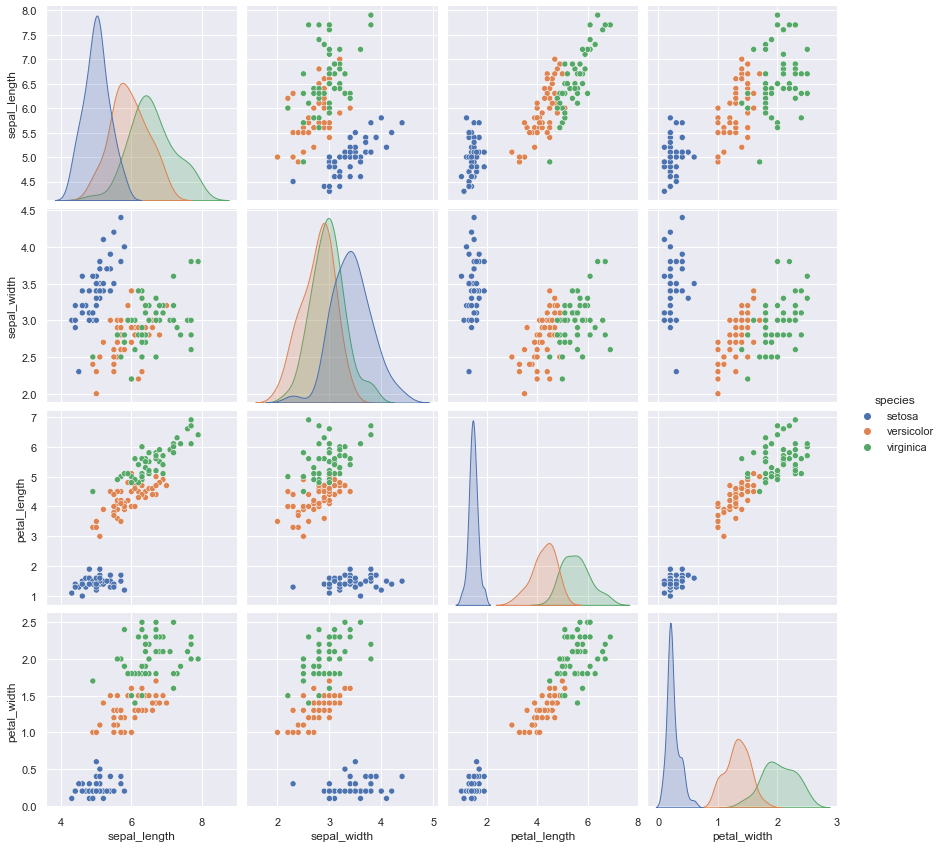

In [3]:
### trong ví dự này, để khái quát chung bộ dữ liệu và tìm mối tương quan giữa 
## chúng ta sư dụng: pairplot trong sns

sns.set()
sns.pairplot(iris, hue='species', height=3);

In [11]:
X_iris = iris.drop?

In [4]:
X_iris = iris.drop('species', axis='columns')
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

- Dễ hiểu hơn, ta có hình sau:
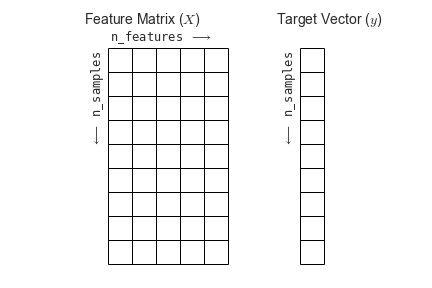

## Scikit-Learn's Estimator API
API Scikit-Learn được thiết kế dựa trên các nguyên tắc:
- Consistency (Tính nhất quán): tất cả các đôi tượng được chia sẻ một giao diện chung được rút ra từ một tập hợp giới hạn các phương thức, với tài liệu nhất quán
- Inspection (): tất cả các giá trị tham số đã chỉ định được hiển thị dưới dạng thuộc tính công khai
- Limited object hierachy (Hạn chế phân cấp đối tượng): Chỉ các thuật toán được đại diện bởi Python, hay có bộ dữ liệu ở định dạng tiêu chuẩn
- Composition: Nhiều tác vụ học máy có thể được hiển thị dưới dạng chuỗi các thuật toán cơ bản
- Sensible defaults: Khi các mô hình yêu cầu tham số do người dùng chỉ định, thư viện sẽ xác định giá trị mặc định phù hợp.

=> từ những nguyên tắc này làm cho sklearn dẽ sử dụng, mọi thuật toán học máy đều được triển khai thông qua API, cung cấp giao diện nhất quán cho nhiều ứng dụng học máy

### Basic of the API
các bước sử dụng API estimator scikit-learn như sau:
1. Chọn một mô hình thích hợp
2. Chọn siêu tham số mô hình (hyperparameters) bằng cách khởi tạo lớp này với các giá trị mong muốn
3. Tiếp theo, sắp xếp dữ liệu thành một ma trận đặc trưng và vector mục tiêu
4. Khớp mô hình với dữ liệu bằng cách gọi phương thức `fit()`
5. Áp dụng mô hình cho dữ liệu:
- Đối vói học có giám sát (supervised learning): ta dự đoán nhãn cho dữ liệu chưa biết bằng phương thức `predict()`
- Đối vói học không giám sát (unsupervised learning): ta biến đổi hoặc suy ra các thuộc tính của dữ liệu bằng cách sử dụng phương thức `transform()` hoặc `predict()` 


Một số ví du:

### Supervised learning example: Simple Linear Regression
- Hồi quy đơn biến

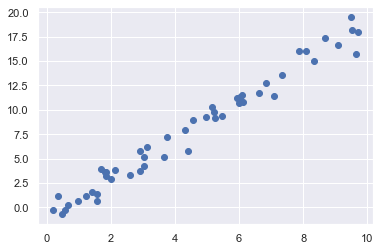

In [6]:
# Khởi tạo dữ liệu

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2*x - 1 + rng.randn(50)

plt.scatter(x, y);

### 1. Choose a class of model
- vì đây là bài toán hồi quy tuyến tính, nên ta lựa chọn mô hình hồi quy tt

In [7]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparemeter
- Một điểm quan trọng là một lớp mô hình không giống như một thể hiện của mô hình
- Khi chúng ta quyết định về mô hình của mình, và vẫn còn một số tuỳ chọn mở. Tuỳ thuộc vào lớp mô hình mà ta lựa chọn, chúng ta có thể trả lời một hoặc những câu hỏi sau:
1. Would we like to fit for the offset (i.e., y-intercept)?
2. Would we like the model to be normalized?
3. Would we like to preprocess our features to add model flexibility?
4. What degree of regularization would we like to use in our model?
5. How many model components would we like to use?

Đây là những ví dụ về các lựa chọn quan trọng phải được thực hiện khi lớp mô hình được chọn. Nhứng lựa chọn này thường được biểu diễn dưới dạng siêu tham số hoặc tham số phải được chọn trước khi mô hình phù hớp với dữ liệu.
- Đối với ví dụ này, ta điều chỉnh siêu tham số với `fit_intercept`

In [8]:
model = LinearRegression(fit_intercept=True)
model

### Lưu ý: khi mô hình được khởi tạo, thì hành động duy nhất là lưu trữ các
### giá trị siêu tham số này

LinearRegression()

### 3. Arrange data into a features matrix and target vector
- Từ cơ sở lý thuyết đã trình bày. Thì bài này biến mục tiêu `y` đã ở dạng chính xác là một vector với độ dài `n_samples`, nhưng ta cần điều chỉnh X để đưa nó về dạng ma trận có kích thước `[n_samples, n_features]`

In [9]:
X = x[:, np.newaxis]
X.shape
y.shape

(50,)

### Fit the model to your data
- Áp dụng mô hình vào dữ liệu

In [10]:
model.fit(X, y)

LinearRegression()

- Phương thức `fit()` này thực hiện một số tính toán bên trong phụ thuộc vào mô hình và kết quả của những tính toán được lưu trữ trong các thuộc tính dành riêng cho mô hình. Tất cả các tham số mô hình được học trong quá trình fit() đều có dấu `gạch dưới` ở cuối

In [11]:
model.coef_

array([1.9776566])

In [12]:
model.intercept_

-0.9033107255311164

- Hai tham số này biểu thị độ dốc và hệ số chặn của mô hình hqtt đơn giản

### 5. Predict labels for unknow data
- Sau khi mô hình được đào tạo, thì trong học có giám sát là dựa trên mô hình để nói về dữ liệu mới không thuộc tập huấn luyện, ta sử dụng phương thức `predict()`

In [13]:
xfit = np.linspace(-1, 11)

In [14]:
Xfit = x[:, np.newaxis]
Xfit.shape


(50, 1)

In [15]:
yfit = model.predict(Xfit)
yfit.shape

(50,)

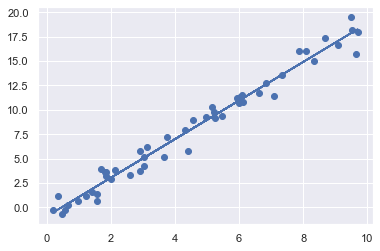

In [16]:
plt.scatter(x, y)
plt.plot(Xfit, yfit);

### Supervised learning example: Iris classification
- Với bộ dữ liệu `Iris` này, câu hỏi được đưa ra là: đưa ra mô hình được đào tạo trên một phần dữ liệu Iris, sau đó ta có thể dự đoán các nhãn còn lại tốt như thế nào?
- Để làm được, ta sử dụng mô hình tổng quát: Gaussian naive Bayes,tiến hành bằng cách giả sử mỗi lớp được rút ra từ một phân phối Gaussian (an axis-aligned Gaussian distribution - tìm hiếu sau ). Bởi vì nó quá nhanh và khong có siêu tham số để chọn, nên Gaussion naive Bayes thường là mô hình tốt để sử dụng làm phân loại cơ sở.
- Để đánh giá mô hình với dữ liệu mà nó chưa từng thấy trước đây, nêm ta chia dữ liệu thành tập huấn luyện (training set) và tập thử nghiệm (testing set).

In [17]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)


In [18]:
from sklearn.naive_bayes import GaussianNB  # choose model class
model = GaussianNB()                        # instantiate model
model.fit(Xtrain, ytrain)                   # fit model to data
y_model = model.predict(Xtest)              # predict on the newdata

In [19]:
### sử dụng accuracy_score(độ chính xác) kiểm tra độ khớp của mô hình
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Với độ chính xác lên đến hơn 97% thì ta thấy rằng ngày cả thuật toán phân loại rất ngây thơ cũng có hiệu quả với tập dữ liệu này

### Unsupervised learning example: Iris dimensionality
- trong ví dụ này, ta sẽ xem xét việc giảm số chiều của tập Iris để dễ hình dung hơn. Vì tập Iris là 4 chiều: có 4 đặc trưng được ghi lại
- nhiệm vụ của giảm chiều dữ liệu là hỏi liệu biểu diễn ở chiều thấp hơn có phù hợp để giữ lại các đặc trưng quan trọng của dữ liệu hay không. Thông thường, việc giảm chiều được sử dụng như một công cụ để hỗ trợ trực quan dữ liệu, hay đơn giản là việc vẽ biểu đồ với 2 chiều dữ liệu đơn giản hơn nhiều so với 4 chiều
- trong bài này ta sử dụng kĩ thuật phân tích thành phần chính (`principal component analysis - PCA`) đây là một kĩ thuật giảm kích thước tuyến tính nhanh. Chúng ta sẽ yêu cầu mô hình trả về 2 đặc trưng, tức 2 chiều của dữ liệu

In [20]:
from sklearn.decomposition import PCA       # choose the model class
model = PCA(n_components=2)                 # instantiate the model with hyperparameter
model.fit(X_iris)                           # fit to data, notice y is no specified
X_2D = model.transform(X_iris)              # Transform the data to 2 dimension


D:\INSTALL\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


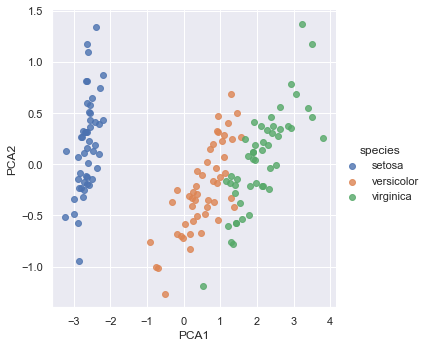

In [21]:
## truc quan ket qua

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot('PCA1', 'PCA2', data = iris, hue = 'species', fit_reg=False);

Ta thấy được, khi biểu diễn với 2 chiều các loại được phân tách khá rõ ràng, mặc dù PCA không biết gì về nhãn của `species`

### Unsupervised learning: Iris clustering
- tiếp theo chúng ta xét đến việc áp dụng phân cụm cho tập dữ liệu iris. Thuật toán phân cụm sẽ cố gắng tìm các nhóm dữ liệu mà không cần tham chiếu đến bất kì nhãn nào. Ví dụ này sử dụng phương pháp phân cụm `Gaussion Mixture method - GMM`

In [22]:
from sklearn.mixture import GaussianMixture      # choose the model class
model = GaussianMixture(n_components=3,   
                       covariance_type='full')   # Instantiate the model with hyperparameter

model.fit(X_iris)                                # Fit to data. Notice y is no specified
y_gmm = model.predict(X_iris)                    # determine cluster labels

D:\INSTALL\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


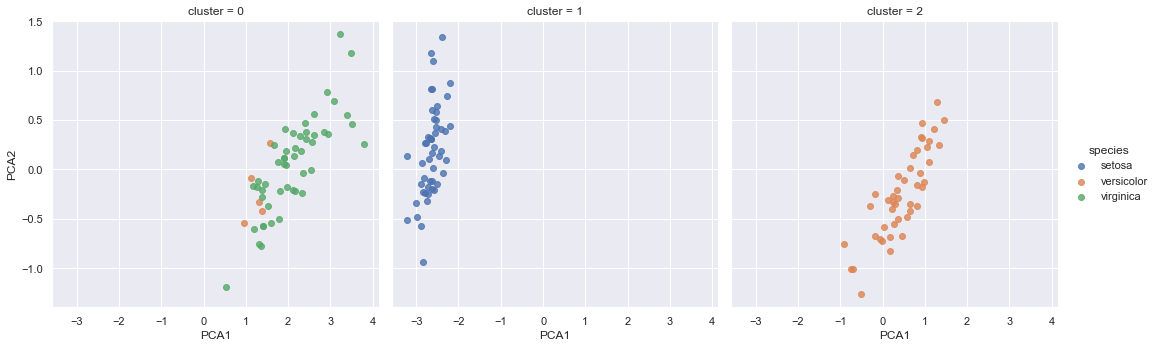

In [23]:
iris['cluster'] = y_gmm
sns.lmplot('PCA1', 'PCA2', data = iris, hue='species',
          col = 'cluster', fit_reg=False);

Bằng cách chia dữ liệu theo số cụm, chúng ta thấy chính xác thuật toán GMM đã khôi phục nhãn cơ bản tốt như thế nào: loài setosa được phân tách hoàn hảo trong cụm 0, trong khi vẫn còn một lượng nhỏ trộn lẫn giữa versicolor và virginica. Điều này có nghĩa là ngay cả khi không có chuyên gia cho chúng tôi biết nhãn loài của từng bông hoa, số đo của những bông hoa này đủ khác biệt để chúng tôi có thể tự động xác định sự hiện diện của các nhóm loài khác nhau này bằng thuật toán phân cụm đơn giản! Loại thuật toán này có thể cung cấp thêm cho các chuyên gia trong lĩnh vực này manh mối về mối quan hệ giữa các mẫu mà họ đang quan sát.

## Aplication: Exploring Hand-written digits
- để hiểu thêm về những điều trên, ta sẽ xét ví dụ về một phận của bài toán nhận dạng ký tự quang học: nhận dạng số viết tay. trong thực tế, vấn đề này liên quan đến cả việc định vị và xác định các ky tự trong một hình ảnh.

### Loading and visualizing the digits data


In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

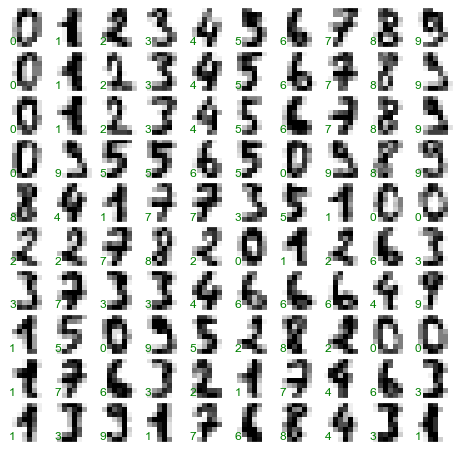

In [25]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw = {'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), 
           transform=ax.transAxes, color='green')

- Để làm việc này trong sklearn, chúng ta cần biểu diễn dữ liệu với 2  chiều `[n_samples, n_features]`. Chúng ta thực hiện điều này bằng cách coi mỗi pixel trong hình ảnh là một đối tượng địa lý: nghĩa là bằng cách làm phẳng các mảng pixel để chúng ta có một mảng giá trị pixel dài 64 đại diện cho mỗi chữ số. Hai đại lượng này được tích hợp vào bộ dữ liệu chữ số theo thuộc tính `data` và `target`

In [26]:
X = digits.data
X.shape

(1797, 64)

In [27]:
y = digits.target
y.shape

(1797,)

$=>$ chungs ta co 1797 samples, 64 features

### Unsupervised learning: Demensionality reduction
- Trong ví dụ, nếu ta muôn trực quan hoá các điểm của mình trong không gian với 64 chiều tham số và điều này rất khó để làm trong không gian nhiều chiều như vậy. Thay vào đó, ta sẽ giảm chúng xuống còn 2 chiều, sử dụng học tập không giám sát. Tại đây, ta sử dụng thuật toán học tập đa dạng (`Isomap` - tìm hiều ở những bài kế). Chuyển đổi dữ liệu thành 2 chiều:


In [60]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

D:\INSTALL\anacoda\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
D:\INSTALL\anacoda\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

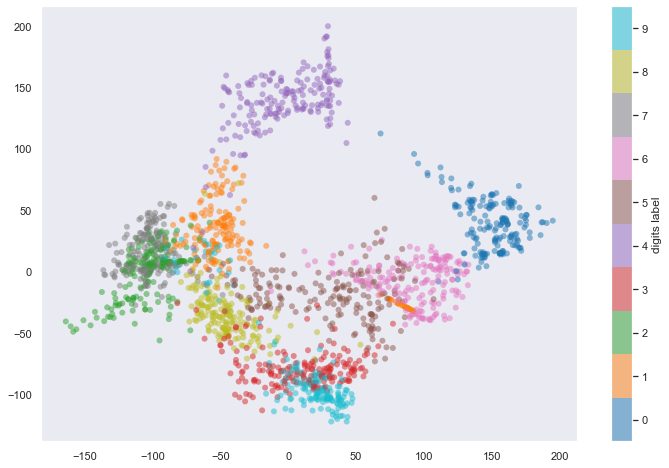

In [58]:
### visualizing
plt.rcParams["figure.figsize"] = (12,8)
plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target,
           edgecolor='none', alpha=0.5,
           cmap=plt.get_cmap('tab10', 10))
plt.colorbar(label='digits label', ticks=range(10))
plt.clim(-0.5, 9.5);

- nhìn biểu đồ, ta có một trực quan tốt về cách các số khác nhau được phân tách, các màu của các số là khác nhau. Theo trực quan, điều này có nghĩa: số 0 trống ở giữa hình ảnh, trong khi số 1 thường có mực ở giữa. Mặt khác, dường như có một phổ quang liên tục ít nhiều giữa số một và bốn, ta có thể hiểu điều này bằng cách nhận ra rằng một số người khi viết số một thường có thêm vết móc, điều này khiến chúng giống số bốn.


$=>$ nhìn chung, các nhóm khác nhau đã được phân tách khá tốt trong không gian tham số: điều này cho chúng ta biết rằng ngay cả thuật toán phân loại được giám sất rất đơn giản cũng phù hợp với dữ liệu này.

### Classification on digits

In [61]:
### phan tach cac tap du lieu
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [65]:
### huan luyen

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)


In [68]:
### kiem tra do chinh xac - accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Tuy chỉ là một mô hình đơn giản, những chúng ta cũng đã nhận được độ chính xác hơn 80%. Tuy nhiên chỉ với điều này khong cho ta biết, ta đã sai ở đâu, cách hay để làm điều này là sử dụng ma trận nhầm lẫn `(confusion matrix)`

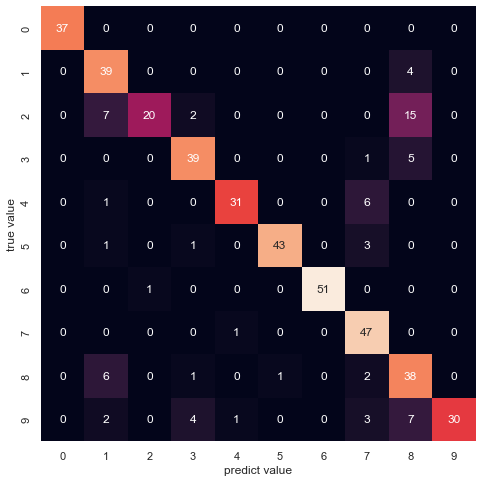

In [72]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predict value')
plt.ylabel('true value');

Điều này cho chúng ta thấy các điểm bị dán nhãn sai có xu hướng nằm ở đâu, vd: một lượng lớn các điểm 2 bị phân loại sai thành điểm một hoặc tám. Một cách khác đẻ có thể trực quan về các đặc điểm của mô hình là vẽ lại các đầu vào, với các nhãn dự đoán chúng. Ở đây ta sẽ dùng màu xanh lục cho nhãn chính xác và đỏ cho nhãn chưa chính xác.

In [ ]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')

Kiểm tra tập hợp con dữ liệu này, chúng ta có thể hiểu rõ hơn về vị trí mà thuật toán có thể hoạt động không tối ưu. Muốn vượt qua được tỉ lệ 80% thì chúng ta phải sử dụng các thuật toán học máy phức tạp hơn, được tìm hiểu ở những bài tiếp theo



### Kết luận
Trong phần này, chúng tôi đã đề cập đến các tính năng thiết yếu của biểu diễn dữ liệu Scikit-Learn và API công cụ ước tính. Bất kể loại công cụ ước tính nào, mẫu nhập/khởi tạo/khớp/dự đoán đều giống nhau. Được trang bị thông tin này về API công cụ ước tính, bạn có thể khám phá tài liệu Scikit-Learn và bắt đầu thử các mô hình khác nhau trên dữ liệu của mình.
